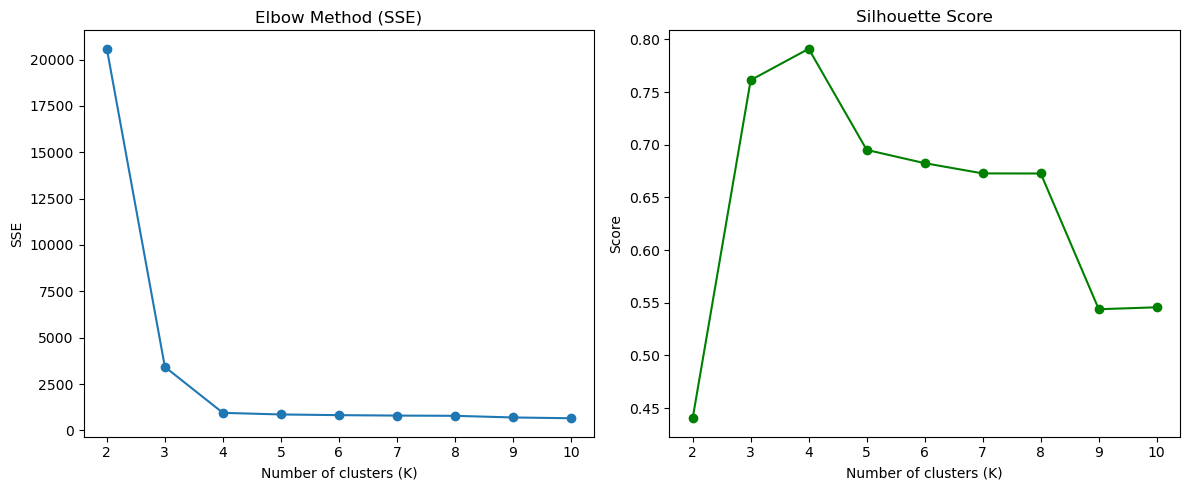

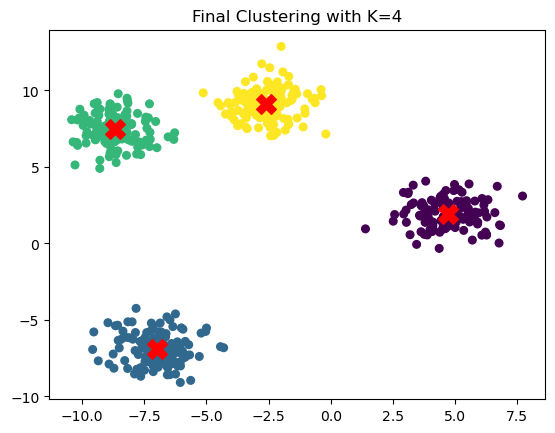

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.metrics import silhouette_score

# Step 1: Generate synthetic data
X, _ = make_blobs(n_samples=500, centers=4, cluster_std=1.0, random_state=42)

# Step 2: Euclidean distance function
def euclidean(a, b):
    return np.linalg.norm(a - b)

# Step 3: K-Means implementation
def kmeans(X, K, max_iters=100):
    np.random.seed(42)
    centroids = X[np.random.choice(len(X), K, replace=False)]
    for _ in range(max_iters):
        clusters = [[] for _ in range(K)]
        for x in X:
            distances = [euclidean(x, c) for c in centroids]
            cluster_idx = np.argmin(distances)
            clusters[cluster_idx].append(x)
        new_centroids = np.array([np.mean(cluster, axis=0) for cluster in clusters])
        if np.allclose(centroids, new_centroids):
            break
        centroids = new_centroids
    labels = np.zeros(len(X))
    for idx, cluster in enumerate(clusters):
        for point in cluster:
            labels[np.where((X == point).all(axis=1))[0][0]] = idx
    return centroids, labels

# Step 4: Elbow and Silhouette methods
sse = []
silhouette_scores = []
K_range = range(2, 11)
for K in K_range:
    _, labels = kmeans(X, K)
    sse.append(np.sum([euclidean(X[i], X[labels == labels[i]].mean(axis=0))**2 for i in range(len(X))]))
    silhouette_scores.append(silhouette_score(X, labels))

# Step 5: Plot SSE and Silhouette scores
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(K_range, sse, marker='o')
plt.title('Elbow Method (SSE)')
plt.xlabel('Number of clusters (K)')
plt.ylabel('SSE')

plt.subplot(1, 2, 2)
plt.plot(K_range, silhouette_scores, marker='o', color='green')
plt.title('Silhouette Score')
plt.xlabel('Number of clusters (K)')
plt.ylabel('Score')
plt.tight_layout()
plt.show()

# Step 6: Final clustering and visualization
optimal_K = K_range[np.argmax(silhouette_scores)]
centroids, final_labels = kmeans(X, optimal_K)

plt.scatter(X[:, 0], X[:, 1], c=final_labels, cmap='viridis', s=30)
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='X', s=200)
plt.title(f'Final Clustering with K={optimal_K}')
plt.show()